# PGR Python Session 03

## Aims

By the end of this course in December, you should be familiar with the major Python tools to analyze large numerical data sets and generate complex plots.

In the next few session I will cover brief introductions to the following libraries in parallel to the relevant datacamp courses:

- numpy
- pandas
- scipy 
- matplotlib
- seaborn

Im covering a lot of material here very quickly; the main aim is to get you started but most of the work you will have to do yourself. Use the datacamp projects to do so, and also start working with your own data as soon as possible.

Today we will cover numpy.


## Python Packages and Import

Python packages are a way to organize and manage related modules, facilitating code reuse and modularity. 

### Packages from the standard library: 
These are readily available but must be imported with an import statement. 

In [2]:
import math
import random

print(math.sqrt(16))
print([random.randint(1, 100) for _ in range(10)])


4.0
[57, 85, 12, 29, 93, 28, 79, 98, 60, 57]


### External packages: 
These must be imported from the the Pypi repository via pip install. Eg. numpy, pandas etc.
There are about 600.000 opensource packages available on pypi. The rich and very active open source python community is one of the big advantages of the language.
https://pypi.org/

Make sure you have the pgr-course env activated and type in the terminal
```bash
 pip install numpy scipy pandas matplotlib seaborn pillow
 ```
This downloads the numpy code for you into your virtual environment.
Now you still have to import it into your file

In [2]:
import numpy as np


The import statement syntax can vary, but for now just remember to import the package and give it an abbrevation. np for numpy pd for pandas etc. These are just conventions. 
After you import it you have numpy functions available using the np. abbreviation.


In [3]:
random_array = np.random.randint(
    0, 1001, size=10
)  # generates an array of a 10 random values from 0-1000
print(random_array)
print(type(random_array))
print(random_array.shape)
print(len(random_array))
print(np.mean(random_array))


[ 64 796 653 922 381  43 829 355 701 968]
<class 'numpy.ndarray'>
(10,)
10
571.2


## Numpy introduction

- fast (direct access to C-functions)
- holds values of a single type
- multi-dimensional
- used for large scale maths, linear algebra
- core library for data analysis, ML and deep learning -> pandas, pytorch

To do meaningful data analysis a programming language needs to handle multi-dimensional arrays.
For example to be able to deal with spread-sheet formats, or images. In many cases these data structures can become very large, so speed is also critical. Python only has one-dim data structures in the standard library and is slow.

Numpy (and Pandas, which is build on numpy) solves this for Python. It introduces the ndarray, a high-performance multi-dimensional array object that allows you to store and manipulate large datasets efficiently. With NumPy, you can perform complex mathematical operations on entire arrays without writing extensive loops, making your code both cleaner and faster.

One of the main reasons NumPy is so fast is its direct access to C, bypassing the Python interpreter. While Python is easy to read and write, it can be slower for heavy numerical computations. NumPy leverages optimized C code behind the scenes to handle these intensive tasks, significantly boosting performance. This means that operations like matrix multiplication, statistical calculations, and other numerical tasks are executed much more quickly than if they were done using pure Python.

Let's compare how long it takes to square all the values in a large random_array

In [5]:
# generate a large array and convert to list
random_array = np.random.randint(0, 1001, size=100000000)
random_list = random_array.tolist()

In [6]:
squared_array = random_array**2
np.mean(squared_array)

np.float64(333524.20232529)

In [7]:
squared_list = [num**2 for num in random_list]
np.mean(squared_list)

np.float64(333524.20232529)

Numpy achieves this gain in speed by performing operations on entire arrays or large chunks of data at once, rather than using explicit loops. This approach is called vectorisation. It leverages NumPy’s optimized, low-level implementations to execute computations much faster than traditional Python loops.


working with multi-dim data and list is even more awkward.
For example, a 2D data structure (rows and columns) could be represented as a list of lists

In [8]:
# gene expression data in two different tumours A and B
gene0 = [100, 200]
gene1 = [50, 0]
gene2 = [350, 100]
expression_data = [gene0, gene1, gene2]
expression_data


[[100, 200], [50, 0], [350, 100]]

In [9]:
# For example to get the first column (info on tumor A) of data we have to loop again
first_col = [list[0] for list in expression_data]
first_col

[100, 50, 350]

### ndarray (N-Dimensional Array)

The ndarray is the core data structure in NumPy. It stands for “N-dimensional array,” where “N” can be any number of dimensions (1D, 2D, 3D, etc.). Here are some key features:
- Homogeneous Data: All elements in an ndarray must be of the same data type (e.g., all integers or all floats), which allows for efficient storage and computation.
- Shape and Dimensions: Each ndarray has a shape (a tuple indicating the size in each dimension) and a number of dimensions (also known as axes).
- Efficient Operations: NumPy provides a wide range of optimized functions to perform mathematical operations on ndarrays quickly without the need for explicit loops.


In [10]:
# generate 2D numpy array from the list we made above
array2d = np.array(expression_data)
print(array2d)
print(array2d.shape)
print(type(array2d))


[[100 200]
 [ 50   0]
 [350 100]]
(3, 2)
<class 'numpy.ndarray'>


In [11]:
# This allows us to retrieve both column and row data much more easily
print(array2d[:, 0])  # get the first column
print(array2d[0, :])  # get the first row


[100  50 350]
[100 200]


### Attributes and Methods
Numpy comes with lost of functionality for maths and statistics.
A few examples below..


In [12]:
print(squared_array.mean())
print(squared_array.max())
print(squared_array.min())
print(squared_array.std())
print(np.median(squared_array))
print(np.percentile(squared_array, 90))


333535.15695007
1000000
0
298479.07769261894
250000.0
810000.0


### Mastering Shape
Shape is a key concept when you’re using multidimensional arrays. At a certain point, it’s easier to forget about visualizing the shape of your data and to instead follow some mental rules and trust NumPy to tell you the correct shape.

All arrays have a property called .shape that returns a tuple of the size in each dimension. It’s less important which dimension is which, but it’s critical that the arrays you pass to functions are in the shape that the functions expect. A common way to confirm that your data has the proper shape is to print the data and its shape until you’re sure everything is working like you expect.
The simplest shape is one dimension, which is called a vector. Two dimension would be the representation of an image for example or any other 2D matrix of data. Shape can get very complex.




In [13]:
vector = np.array([29.3, 42.1, 18.8, 16.1, 38.0, 12.5, 12.6, 49.9, 38.6, 31.3, 9.2, 22.])
vector.shape

(12,)

In [14]:
matrix = vector.reshape(2, 2, 3)
matrix

array([[[29.3, 42.1, 18.8],
        [16.1, 38. , 12.5]],

       [[12.6, 49.9, 38.6],
        [31.3,  9.2, 22. ]]])

In [15]:
matrix.shape

(2, 2, 3)

In [16]:
new_matrix = np.swapaxes(matrix, 1, 2)
new_matrix


array([[[29.3, 16.1],
        [42.1, 38. ],
        [18.8, 12.5]],

       [[12.6, 31.3],
        [49.9,  9.2],
        [38.6, 22. ]]])

In [17]:
new_matrix.max(axis=0)


array([[29.3, 31.3],
       [49.9, 38. ],
       [38.6, 22. ]])

This operation finds the maximum value along the first axis (axis=0), which means it compares the corresponding elements of each block.
For each position in the 2x3 structure, it takes the maximum value from the two blocks.
Resulting array:
[[max(29.3, 12.6), max(16.1, 31.3)],
[max(42.1, 49.9), max(38.0, 9.2)],
[max(18.8, 38.6), max(12.5, 22.0)]]

In [18]:
new_matrix.max(axis=1)


array([[42.1, 38. ],
       [49.9, 31.3]])

### Indexing

In [19]:
new_matrix

array([[[29.3, 16.1],
        [42.1, 38. ],
        [18.8, 12.5]],

       [[12.6, 31.3],
        [49.9,  9.2],
        [38.6, 22. ]]])

In [20]:
# getting only the first or 2nd matrix, indexing on the first axis

new_matrix[0]

array([[29.3, 16.1],
       [42.1, 38. ],
       [18.8, 12.5]])

In [21]:
new_matrix[1,0,0]


np.float64(12.6)

## Numpy arrays as images
A common package to work with images in python is called pillow.
We can install this again the conda environment using pip install pillow
Images in python are treated as numpy arrays.

In [22]:
#A  library is called Pillow, we use this to import a TIFF file
from PIL import Image

image = Image.open("nuclei.tiff")
print(type(image))
image_array = np.array(image)
print(type(image_array))
print(image_array.shape)


<class 'PIL.TiffImagePlugin.TiffImageFile'>
<class 'numpy.ndarray'>
(1020, 1020)


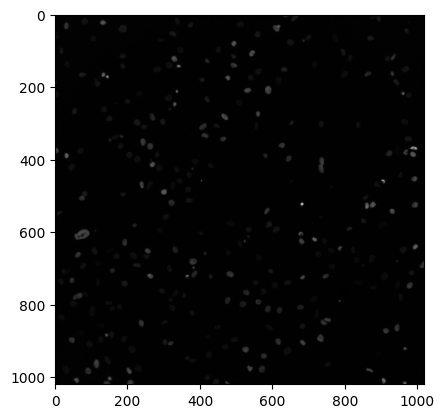

In [23]:
import matplotlib.pyplot as plt
plt.imshow(image_array, cmap="gray")


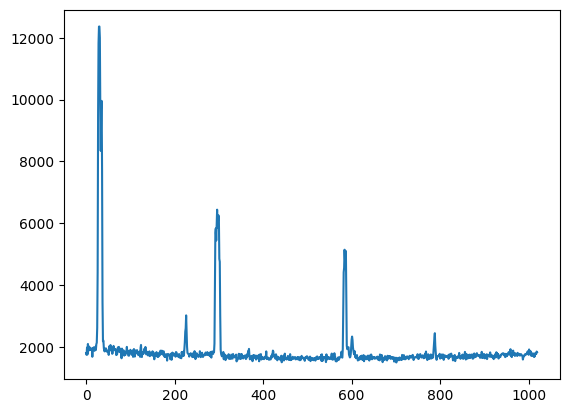

In [24]:
plt.plot(image_array.diagonal())

np.True_

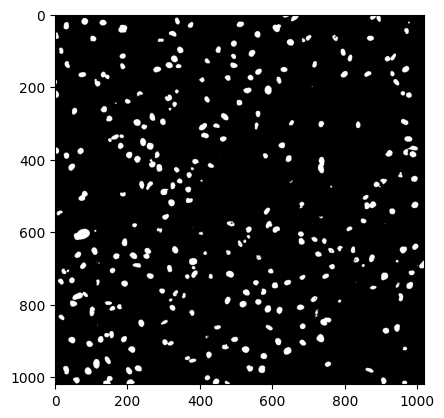

In [31]:
#otsu thresholding
otsu_array = image_array > 3000
plt.imshow(otsu_array, cmap="gray")
otsu_array.max()



## . Suggestions for Further Study
- Advanced NumPy Topics
1) Broadcasting rules and mechanics
2) Memory management and views vs copies
3) Structured arrays and dtypes
4) Advanced indexing techniques (boolean indexing, fancy indexing)
5) Universal functions (ufuncs)
- Related Areas
1) Linear algebra with NumPy
2) Random number generation and statistics
3) Integration with other scientific libraries (scipy, scikit-learn)
4) Performance optimization techniques
5) Memory-efficient operations for large datasets

In [ ]:
"""
Exercise 1: Shape Shifting
Create a 1D array of numbers 1-12, then:
a) Reshape it into a 3x4 matrix
b) Reshape it into a 2x2x3 array
c) Calculate the mean of each row in the 3x4 matrix
"""

"""
Exercise 2: Image Processing
Using the nuclei image:
a) Create a mask for pixels above the 75th percentile
b) Calculate the average intensity in this masked region
c) Create a new image showing only the brightest 25% of pixels
"""

"""
Exercise 3: Data Analysis
Create two 2D arrays representing:
- Temperature readings (5x7) for a week (7 days, 5 measurements per day)
- Humidity readings (5x7) for the same period
Then:
a) Find the hottest temperature for each day
b) Calculate the average humidity when temperature is above 25°C
c) Find the time slots where both temperature and humidity are above their respective means
"""
